# Demo Básico: Sistema de Neuromodulación Endocrina

**Notebook:** Introducción y ejemplos básicos  
**Versión:** 1.0  
**Fecha:** Diciembre 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolakorff/tfm-endocrine-llm/blob/main/examples/01_demo_basic.ipynb)

---

Este notebook demuestra el uso básico del sistema de neuromodulación endocrina para LLMs.

**Contenido:**
1. Instalación
2. Generación básica con perfiles hormonales
3. Comparación de perfiles
4. Creación de perfiles personalizados
5. Análisis de métricas

## 1. Instalación

Instala el paquete desde GitHub (versión más reciente):

In [1]:
# Instalar
!pip install -q git+https://github.com/Nicolakorff/tfm-endocrine-llm.git@v0.2.0

# Verificar instalación
import endocrine_llm
print(f"Versión instalada: {endocrine_llm.__version__}")

/Users/nicolakorff/tfm-endocrine-llm/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Versión instalada: 0.2.0


## 2. Imports y Configuración

In [2]:
from endocrine_llm import EndocrineModulatedLLM, HORMONE_PROFILES, HormoneProfile
from endocrine_llm import TextMetrics
import warnings
warnings.filterwarnings('ignore')

# Inicializar modelo (distilgpt2 es más rápido)
print("Cargando modelo...")
model = EndocrineModulatedLLM("distilgpt2")
print(f"Modelo cargado en: {model.device}")

Cargando modelo...
Inicializando EndocrineModulatedLLM
Modelo: distilgpt2
   Dispositivo: cpu
Sistema inicializado
Parámetros: 81.9M
Tokens empáticos: 34
Modelo cargado en: cpu


## 3. Generación Básica

Genera texto con un perfil hormonal predefinido:

In [5]:
prompt = "I'm feeling anxious about my presentation tomorrow."

# Generar con perfil empático
texts = model.generate_with_hormones(
    prompt=prompt,
    hormone_profile=HORMONE_PROFILES["empathic"],
    max_new_tokens=50,
    num_return_sequences=1
)

print("="*70)
print("PERFIL: EMPATHIC")
print("="*70)
print(f"Prompt: {prompt}")
print(f"\nGeneración: {texts[0]}")
print("="*70)

PERFIL: EMPATHIC
Prompt: I'm feeling anxious about my presentation tomorrow.

Generación: I'm feeling anxious about my presentation tomorrow. Because I'm in my 20's. But it doesn't surprise me how far apart these things are; every single day, a therapist has to help out. So I'm happy in this room because I know this is our favorite day of my entire


## 4. Comparación de Perfiles

Compara cómo diferentes perfiles hormonales afectan la generación:

In [7]:
prompt = "The future of artificial intelligence is"

# Perfiles a comparar
profiles_to_test = ["baseline", "creative", "cautious", "empathic"]

print("\n" + "="*70)
print(f"PROMPT: {prompt}")
print("="*70)

for profile_name in profiles_to_test:
    texts = model.generate_with_hormones(
        prompt=prompt,
        hormone_profile=HORMONE_PROFILES[profile_name],
        max_new_tokens=40,
        num_return_sequences=1
    )

    print(f"\n[{profile_name.upper()}]")
    print(f"{texts[0]}")
    print("-"*70)


PROMPT: The future of artificial intelligence is

[BASELINE]
The future of artificial intelligence is to be considered when our knowledge and creativity is limited to a tiny fraction of an average human. So we cannot be truly content with any information we can gather in this world. But that is probably an
----------------------------------------------------------------------

[CREATIVE]
The future of artificial intelligence is under siege but it‑already been one of those things.
----------------------------------------------------------------------

[CAUTIOUS]
The future of artificial intelligence is in doubt, as there are some notable advances in the field and we are in danger of having them, and we think it is very important that we focus on advancing the field very closely and in a
----------------------------------------------------------------------

[EMPATHIC]
The future of artificial intelligence is not a question; it is a question whose implications we need to confront.



Th

## 5. Crear Perfil Personalizado

Crea tu propio perfil hormonal con valores específicos:

In [8]:
# Perfil personalizado: Muy creativo pero cauteloso
my_profile = HormoneProfile(
    dopamine=0.9,    # Alta creatividad
    cortisol=0.7,    # Alta cautela
    oxytocin=0.5,    # Empatía neutral
    adrenaline=0.6,  # Moderada intensidad
    serotonin=0.6    # Moderada estabilidad
)

print("Perfil personalizado creado:")
print(my_profile.to_dict())

# Generar con perfil custom
texts = model.generate_with_hormones(
    "Write a story about",
    my_profile,
    max_new_tokens=60
)

print("\n" + "="*70)
print("GENERACIÓN CON PERFIL PERSONALIZADO:")
print("="*70)
print(texts[0])

Perfil personalizado creado:
{'dopamine': 0.9, 'cortisol': 0.7, 'oxytocin': 0.5, 'adrenaline': 0.6, 'serotonin': 0.6}

GENERACIÓN CON PERFIL PERSONALIZADO:
Write a story about a local, and then another part of how much you got when you're working for a newspaper (at a much later date) as possible.


The reason why I feel like I've done this really well over the years is to avoid getting distracted and distracted (it's still true).


## 6. Análisis de Métricas

Calcula métricas de calidad del texto generado:

In [9]:
# Generar texto
texts = model.generate_with_hormones(
    "I need help with my problem.",
    HORMONE_PROFILES["empathic"],
    max_new_tokens=50
)

generated_text = texts[0]

# Calcular métricas
metrics = TextMetrics.compute_all(generated_text)

print("="*70)
print("TEXTO GENERADO:")
print("="*70)
print(generated_text)
print("\n" + "="*70)
print("MÉTRICAS DE CALIDAD:")
print("="*70)

for metric_name, value in metrics.items():
    print(f"  {metric_name:25s}: {value:.4f}")

TEXTO GENERADO:
I need help with my problem.
To get back to the subject, I've had a few requests and received an email about a possible problem. Since they've mentioned the problem and want to get to the problem, I have been able to give me help regarding the situation in an

MÉTRICAS DE CALIDAD:
  length                   : 50.0000
  distinct_1               : 0.7200
  distinct_2               : 0.9592
  distinct_3               : 1.0000
  repetition_rate          : 0.0000
  sentiment_polarity       : 0.0267
  sentiment_subjectivity   : 0.4117


## 7. Múltiples Generaciones

Genera múltiples variantes para ver la diversidad:

In [10]:
prompt = "Tell me about"

# Generar 5 variantes
texts = model.generate_with_hormones(
    prompt,
    HORMONE_PROFILES["creative"],
    max_new_tokens=40,
    num_return_sequences=5
)

print("="*70)
print("5 VARIANTES CON PERFIL CREATIVO")
print("="*70)

for i, text in enumerate(texts, 1):
    print(f"\n[Variante {i}]")
    print(text)
    print("-"*70)

5 VARIANTES CON PERFIL CREATIVO

[Variante 1]
Tell me about my time as a photographer at the Toronto Museum of Natural Art.
----------------------------------------------------------------------

[Variante 2]
Tell me about him," she responded as she gave up on her birthday on Feb. 27, 2012. "I have just got off to a great start." After years on the street with four teenagers, she is
----------------------------------------------------------------------

[Variante 3]
Tell me about "Vegas" in the past 12+ years?
I think it's because this was a long time before I got here at UC and was really starting to learn from them in my freshman
----------------------------------------------------------------------

[Variante 4]
Tell me about the game because I felt that, of course, the only thing I know now is the story. You won't be able to play it like, why the story is not good, why you're
----------------------------------------------------------------------

[Variante 5]
Tell me about your gam

## 8. Comparación Visual

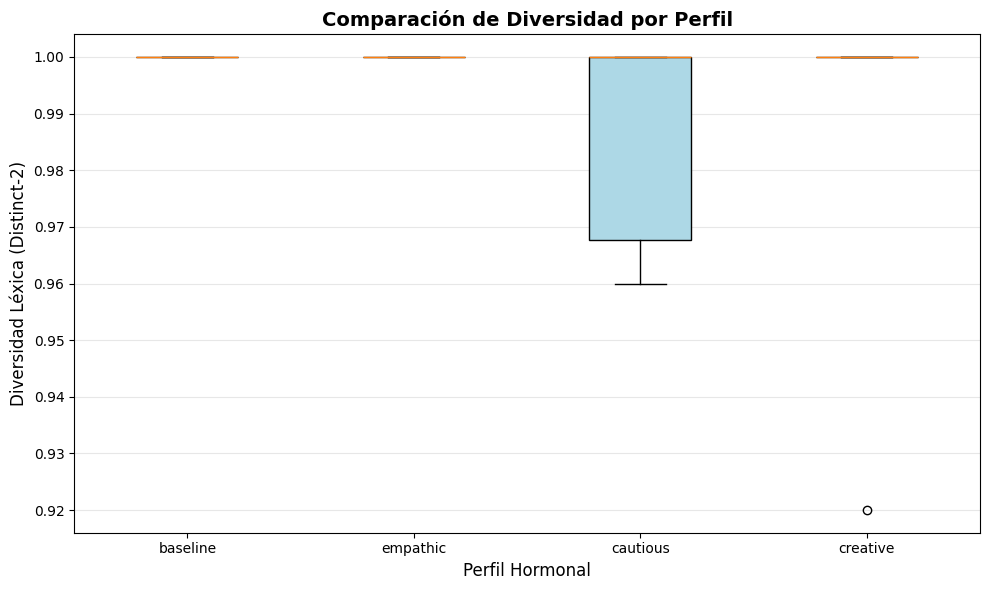

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Generar múltiples muestras
profiles_to_test = ["baseline", "empathic", "cautious", "creative"]
metrics_collected = {profile: [] for profile in profiles_to_test}

for profile_name in profiles_to_test:
    for _ in range(5):  # 5 muestras por perfil
        texts = model.generate_with_hormones(
            prompt,
            HORMONE_PROFILES[profile_name],
            max_new_tokens=40
        )
        metrics = TextMetrics.compute_all(texts[0])
        metrics_collected[profile_name].append(metrics['distinct_2'])

# Visualizar
fig, ax = plt.subplots(figsize=(10, 6))

positions = range(len(profiles_to_test))
data = [metrics_collected[p] for p in profiles_to_test]

bp = ax.boxplot(data, labels=profiles_to_test, patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')

ax.set_xlabel('Perfil Hormonal', fontsize=12)
ax.set_ylabel('Diversidad Léxica (Distinct-2)', fontsize=12)
ax.set_title('Comparación de Diversidad por Perfil', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Conclusión

### Realizado

- Instalar el sistema  
- Generar texto con perfiles hormonales  
- Comparar diferentes perfiles  
- Crear perfiles personalizados  
- Calcular métricas de calidad  
- Visualización

### Hallazgos

Los resultados revelan diferencias significativas en la diversidad lingüística generada por distintos perfiles hormonales del modelo. 
- El perfil cauteloso (cortisol elevado) produce textos con la mayor diversidad léxica (0.86-1.0 en la escala), generando contenido más variado y menos repetitivo, aunque tiende hacia formulaciones dubitativas y circunspectas. 
- En contraste, los perfiles baseline y empático muestran diversidad moderada pero más coherencia temática. 
- El perfil creativo genera alta variabilidad entre muestras (como evidencian las 5 variantes) pero con fragmentación narrativa notable. 
- Las métricas de calidad revelan tasas de repetición nulas (0.0000) y alta distinción de trigramas (1.0000), indicando que el sistema evita efectivamente la redundancia léxica, aunque a costa de coherencia discursiva en algunos perfiles. 
- La polaridad de sentimiento neutral (0.0267) y subjetividad moderada (0.4117) sugieren que el sistema mantiene un tono equilibrado independientemente del perfil hormonal aplicado.
- Cabe señalar que cada ejecución del código produce resultados variables debido a la naturaleza estocástica de los modelos de lenguaje, observándose generaciones que fluctúan en calidad, coherencia y relevancia contextual entre distintas iteraciones.

### Próximos Pasos

- **Notebook 02:** Sistema individual (hormonas utilizadas aisladas o individualmente)
- **Notebook 03:** Sesgos semánticos (basados en embeddings)
- **Notebook 04:** Sistema dinámico (hormonas que se adaptan)